In [338]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

In [339]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[3]
Data_base_learning_v2 = main_path+open_folder[4]
path2 = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\"
open_folder1= os.listdir(path2)
Data_train = path2+open_folder1[10]
Data_test = path2+open_folder1[9]

In [340]:
# train_csv = pd.read_csv(Data_base_learning_v2,sep=";",encoding="utf-8")
# display(train_csv)
# df = train_csv['goalAwayTeam_FullTime']
# df.unique()
# X = train_csv.drop(['id_match','idHomeTeam','idAwayTeam','score','homeTeam','awayTeam','date','goalHomeTeam_HalfTime','goalAwayTeam_HalfTime','goalHomeTeam_FullTime','goalAwayTeam_FullTime'],axis=1).values
# X = X[:,1:]
# Y = train_csv['score'].values
# X[0]
# x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.2)
# print(x_train.shape,y_train.shape)
# y_train = y_train.astype(int)
# y_test = y_test.astype(int)

In [341]:
train_csv = pd.read_csv(Data_train,sep=";",encoding="utf-8")
display(train_csv)

,Unnamed: 0,date,homeTeam,awayTeam,score,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154
1,1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054
2,2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,100
3,3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045
4,4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6020,375,2019-05-18,Levante,Ath Madrid,0.0,2,0,0,0,1.139073,1.678414,0.437086,0.678414,1.140969,0.660793,0.471366,0.229075,5198,11475
6021,376,2019-05-18,Sevilla,Ath Bilbao,1.0,0,1,0,0,1.625551,1.268722,0.651982,0.590308,1.312775,1.162996,0.603524,0.519824,9335,100
6022,377,2019-05-18,Valladolid,Valencia,2.0,2,2,0,0,0.864865,1.506608,0.297297,0.722467,0.215859,1.246696,0.088106,0.533040,4109,100
6023,378,2019-05-19,Eibar,Barcelona,0.0,0,1,1,0,1.246696,2.823789,0.572687,1.074890,1.392070,0.823789,0.629956,0.361233,4455,100


In [342]:
train_columns={'win_cons_home':train_csv.win_cons_home,'win_cons_away':train_csv.win_cons_away,'lose_cons_home':train_csv.lose_cons_home,'lose_cons_away':train_csv.lose_cons_away,'puissance_HomeTeam':train_csv.puissance_HomeTeam,'puissance_AwayTeam':train_csv.puissance_AwayTeam}
df = pd.DataFrame(train_columns)
X = df.values
X

array([[    0,     0,     0,     0,  2409,  6154],
       [    0,     0,     0,     0,  4008,  3054],
       [    0,     0,     0,     0,  3029,   100],
       ...,
       [    2,     2,     0,     0,  4109,   100],
       [    0,     1,     1,     0,  4455,   100],
       [    0,     1,     1,     0, 11475,  5879]], dtype=int64)

In [343]:
Y = train_csv['score'].values
Y[0]

2.0

In [344]:
x_train, x_validation, y_train, y_validation =train_test_split(X,Y, test_size=0.2)
print(x_train.shape,y_train.shape)
y_train = y_train.astype(int)
y_validation = y_validation.astype(int)

(4820, 6) (4820,)


In [321]:
# for row in y_train:
#      print(row)

In [345]:
x_train

array([[    0,     0,     2,     0,  6436,  8931],
       [    0,     2,     3,     0,  3366,  7282],
       [    0,     1,     1,     0,   100,  3861],
       ...,
       [    0,     3,     2,     0,  2974,  2919],
       [    9,     1,     0,     0, 14695,  7151],
       [    0,     0,     2,    10,   100,  1617]], dtype=int64)

In [346]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(5, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [347]:
model = create_model()
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 512)               3584      
_________________________________________________________________
dense_134 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_135 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_136 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_137 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_138 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_139 (Dense)            (None, 512)             

In [348]:
save = ModelCheckpoint('model_CNN.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [349]:
history = model.fit(x_train, y_train,validation_data=(x_validation,y_validation),batch_size=90,epochs=1000,callbacks = [save])

Train on 4820 samples, validate on 1205 samples
Epoch 1/1000
4320/4820 [=========================>....] - ETA: 0s - loss: 49.4151 - accuracy: 0.3812
Epoch 00001: val_accuracy improved from -inf to 0.29876, saving model to model_CNN.h5
4820/4820 [==============================] - 1s 184us/sample - loss: 45.0793 - accuracy: 0.3799 - val_loss: 4.6379 - val_accuracy: 0.2988
Epoch 2/1000
4140/4820 [========================>.....] - ETA: 0s - loss: 3.8708 - accuracy: 0.4167
Epoch 00002: val_accuracy improved from 0.29876 to 0.47137, saving model to model_CNN.h5
4820/4820 [==============================] - 0s 88us/sample - loss: 3.6469 - accuracy: 0.4112 - val_loss: 2.2056 - val_accuracy: 0.4714
Epoch 3/1000
4770/4820 [============================>.] - ETA: 0s - loss: 1.7583 - accuracy: 0.4266
Epoch 00003: val_accuracy did not improve from 0.47137
4820/4820 [==============================] - 0s 81us/sample - loss: 1.7568 - accuracy: 0.4266 - val_loss: 1.3033 - val_accuracy: 0.4066
Epoch 4/100

4500/4820 [===========================>..] - ETA: 0s - loss: 1.0364 - accuracy: 0.4971
Epoch 00028: val_accuracy did not improve from 0.50207
4820/4820 [==============================] - 0s 93us/sample - loss: 1.0355 - accuracy: 0.4967 - val_loss: 1.0678 - val_accuracy: 0.4556
Epoch 29/1000
4140/4820 [========================>.....] - ETA: 0s - loss: 1.0467 - accuracy: 0.4850
Epoch 00029: val_accuracy did not improve from 0.50207
4820/4820 [==============================] - 0s 70us/sample - loss: 1.0496 - accuracy: 0.4832 - val_loss: 1.0995 - val_accuracy: 0.4415
Epoch 30/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 1.0303 - accuracy: 0.4991
Epoch 00030: val_accuracy did not improve from 0.50207
4820/4820 [==============================] - 0s 74us/sample - loss: 1.0309 - accuracy: 0.4975 - val_loss: 1.0533 - val_accuracy: 0.4639
Epoch 31/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 1.0470 - accuracy: 0.4920
Epoch 00031: val_accuracy did not imp

Epoch 56/1000
4770/4820 [============================>.] - ETA: 0s - loss: 1.0265 - accuracy: 0.5042
Epoch 00056: val_accuracy did not improve from 0.50622
4820/4820 [==============================] - 0s 93us/sample - loss: 1.0255 - accuracy: 0.5052 - val_loss: 1.0409 - val_accuracy: 0.4871
Epoch 57/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 1.0231 - accuracy: 0.5122
Epoch 00057: val_accuracy did not improve from 0.50622
4820/4820 [==============================] - 0s 83us/sample - loss: 1.0239 - accuracy: 0.5108 - val_loss: 1.0324 - val_accuracy: 0.4988
Epoch 58/1000
4680/4820 [============================>.] - ETA: 0s - loss: 1.0240 - accuracy: 0.5096
Epoch 00058: val_accuracy did not improve from 0.50622
4820/4820 [==============================] - 0s 80us/sample - loss: 1.0224 - accuracy: 0.5114 - val_loss: 1.0315 - val_accuracy: 0.5004
Epoch 59/1000
4320/4820 [=========================>....] - ETA: 0s - loss: 1.0277 - accuracy: 0.5083
Epoch 00059: val_accura

Epoch 84/1000
4140/4820 [========================>.....] - ETA: 0s - loss: 1.0149 - accuracy: 0.5135
Epoch 00084: val_accuracy did not improve from 0.51037
4820/4820 [==============================] - 0s 75us/sample - loss: 1.0208 - accuracy: 0.5064 - val_loss: 1.0269 - val_accuracy: 0.4929
Epoch 85/1000
4680/4820 [============================>.] - ETA: 0s - loss: 1.0230 - accuracy: 0.5026
Epoch 00085: val_accuracy did not improve from 0.51037
4820/4820 [==============================] - 0s 89us/sample - loss: 1.0230 - accuracy: 0.5029 - val_loss: 1.0316 - val_accuracy: 0.4954
Epoch 86/1000
4050/4820 [========================>.....] - ETA: 0s - loss: 1.0241 - accuracy: 0.5017
Epoch 00086: val_accuracy did not improve from 0.51037
4820/4820 [==============================] - 0s 74us/sample - loss: 1.0217 - accuracy: 0.5039 - val_loss: 1.0250 - val_accuracy: 0.5079
Epoch 87/1000
4770/4820 [============================>.] - ETA: 0s - loss: 1.0205 - accuracy: 0.5096
Epoch 00087: val_accura

Epoch 112/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 1.0143 - accuracy: 0.5091
Epoch 00112: val_accuracy did not improve from 0.51203
4820/4820 [==============================] - 0s 81us/sample - loss: 1.0125 - accuracy: 0.5108 - val_loss: 1.0145 - val_accuracy: 0.4938
Epoch 113/1000
4140/4820 [========================>.....] - ETA: 0s - loss: 1.0046 - accuracy: 0.5147
Epoch 00113: val_accuracy did not improve from 0.51203
4820/4820 [==============================] - 0s 73us/sample - loss: 1.0078 - accuracy: 0.5120 - val_loss: 1.0131 - val_accuracy: 0.4979
Epoch 114/1000
4140/4820 [========================>.....] - ETA: 0s - loss: 1.0087 - accuracy: 0.5072
Epoch 00114: val_accuracy did not improve from 0.51203
4820/4820 [==============================] - 0s 70us/sample - loss: 1.0070 - accuracy: 0.5085 - val_loss: 1.0161 - val_accuracy: 0.4954
Epoch 115/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 1.0066 - accuracy: 0.5104
Epoch 00115: val_ac

Epoch 140/1000
4770/4820 [============================>.] - ETA: 0s - loss: 1.0034 - accuracy: 0.5099
Epoch 00140: val_accuracy did not improve from 0.51203
4820/4820 [==============================] - 0s 93us/sample - loss: 1.0042 - accuracy: 0.5091 - val_loss: 1.0056 - val_accuracy: 0.5004
Epoch 141/1000
4590/4820 [===========================>..] - ETA: 0s - loss: 1.0047 - accuracy: 0.5094
Epoch 00141: val_accuracy did not improve from 0.51203
4820/4820 [==============================] - 0s 79us/sample - loss: 1.0031 - accuracy: 0.5104 - val_loss: 1.0093 - val_accuracy: 0.5012
Epoch 142/1000
4680/4820 [============================>.] - ETA: 0s - loss: 1.0042 - accuracy: 0.5128
Epoch 00142: val_accuracy did not improve from 0.51203
4820/4820 [==============================] - 0s 89us/sample - loss: 1.0036 - accuracy: 0.5137 - val_loss: 1.0077 - val_accuracy: 0.5029
Epoch 143/1000
4320/4820 [=========================>....] - ETA: 0s - loss: 1.0024 - accuracy: 0.5127
Epoch 00143: val_ac

Epoch 168/1000
4140/4820 [========================>.....] - ETA: 0s - loss: 1.0018 - accuracy: 0.5075
Epoch 00168: val_accuracy did not improve from 0.51203
4820/4820 [==============================] - 0s 75us/sample - loss: 1.0013 - accuracy: 0.5083 - val_loss: 1.0150 - val_accuracy: 0.5004
Epoch 169/1000
4590/4820 [===========================>..] - ETA: 0s - loss: 0.9989 - accuracy: 0.5126
Epoch 00169: val_accuracy did not improve from 0.51203
4820/4820 [==============================] - 0s 81us/sample - loss: 1.0012 - accuracy: 0.5124 - val_loss: 1.0160 - val_accuracy: 0.5071
Epoch 170/1000
4140/4820 [========================>.....] - ETA: 0s - loss: 1.0060 - accuracy: 0.5029
Epoch 00170: val_accuracy did not improve from 0.51203
4820/4820 [==============================] - 0s 72us/sample - loss: 1.0020 - accuracy: 0.5062 - val_loss: 1.0061 - val_accuracy: 0.5021
Epoch 171/1000
4230/4820 [=========================>....] - ETA: 0s - loss: 1.0023 - accuracy: 0.5061
Epoch 00171: val_ac

Epoch 196/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 0.9996 - accuracy: 0.5143
Epoch 00196: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 83us/sample - loss: 1.0010 - accuracy: 0.5131 - val_loss: 1.0067 - val_accuracy: 0.5029
Epoch 197/1000
4230/4820 [=========================>....] - ETA: 0s - loss: 0.9957 - accuracy: 0.5170
Epoch 00197: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 74us/sample - loss: 0.9981 - accuracy: 0.5147 - val_loss: 1.0067 - val_accuracy: 0.4938
Epoch 198/1000
4230/4820 [=========================>....] - ETA: 0s - loss: 0.9967 - accuracy: 0.5168
Epoch 00198: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 70us/sample - loss: 0.9974 - accuracy: 0.5166 - val_loss: 0.9990 - val_accuracy: 0.5071
Epoch 199/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 1.0004 - accuracy: 0.5162
Epoch 00199: val_ac

Epoch 224/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 0.9947 - accuracy: 0.5171
Epoch 00224: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 71us/sample - loss: 0.9963 - accuracy: 0.5145 - val_loss: 1.0014 - val_accuracy: 0.5012
Epoch 225/1000
4320/4820 [=========================>....] - ETA: 0s - loss: 0.9934 - accuracy: 0.5169
Epoch 00225: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 71us/sample - loss: 0.9956 - accuracy: 0.5135 - val_loss: 1.0068 - val_accuracy: 0.4996
Epoch 226/1000
4770/4820 [============================>.] - ETA: 0s - loss: 0.9955 - accuracy: 0.5151
Epoch 00226: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 90us/sample - loss: 0.9951 - accuracy: 0.5156 - val_loss: 1.0114 - val_accuracy: 0.5037
Epoch 227/1000
4320/4820 [=========================>....] - ETA: 0s - loss: 0.9964 - accuracy: 0.5148
Epoch 00227: val_ac

Epoch 252/1000
4320/4820 [=========================>....] - ETA: 0s - loss: 1.0003 - accuracy: 0.5125
Epoch 00252: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 70us/sample - loss: 0.9990 - accuracy: 0.5135 - val_loss: 1.0037 - val_accuracy: 0.5054
Epoch 253/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 0.9925 - accuracy: 0.5177
Epoch 00253: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 67us/sample - loss: 0.9928 - accuracy: 0.5176 - val_loss: 1.0069 - val_accuracy: 0.5046
Epoch 254/1000
4590/4820 [===========================>..] - ETA: 0s - loss: 0.9920 - accuracy: 0.5172
Epoch 00254: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 81us/sample - loss: 0.9932 - accuracy: 0.5166 - val_loss: 1.0172 - val_accuracy: 0.4979
Epoch 255/1000
4320/4820 [=========================>....] - ETA: 0s - loss: 0.9922 - accuracy: 0.5181
Epoch 00255: val_ac

Epoch 280/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 0.9941 - accuracy: 0.5190
Epoch 00280: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 67us/sample - loss: 0.9938 - accuracy: 0.5178 - val_loss: 1.0026 - val_accuracy: 0.5037
Epoch 281/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 0.9940 - accuracy: 0.5172
Epoch 00281: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 74us/sample - loss: 0.9903 - accuracy: 0.5197 - val_loss: 1.0074 - val_accuracy: 0.5120
Epoch 282/1000
4140/4820 [========================>.....] - ETA: 0s - loss: 0.9933 - accuracy: 0.5184
Epoch 00282: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 74us/sample - loss: 0.9981 - accuracy: 0.5133 - val_loss: 1.0037 - val_accuracy: 0.5104
Epoch 283/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 1.0029 - accuracy: 0.5141
Epoch 00283: val_ac

Epoch 308/1000
4590/4820 [===========================>..] - ETA: 0s - loss: 0.9880 - accuracy: 0.5207
Epoch 00308: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 94us/sample - loss: 0.9883 - accuracy: 0.5193 - val_loss: 1.0112 - val_accuracy: 0.4988
Epoch 309/1000
4320/4820 [=========================>....] - ETA: 0s - loss: 0.9905 - accuracy: 0.5155
Epoch 00309: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 84us/sample - loss: 0.9906 - accuracy: 0.5162 - val_loss: 1.0026 - val_accuracy: 0.5071
Epoch 310/1000
4140/4820 [========================>.....] - ETA: 0s - loss: 0.9907 - accuracy: 0.5208
Epoch 00310: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 72us/sample - loss: 0.9910 - accuracy: 0.5224 - val_loss: 1.0048 - val_accuracy: 0.4988
Epoch 311/1000
4590/4820 [===========================>..] - ETA: 0s - loss: 0.9885 - accuracy: 0.5227
Epoch 00311: val_ac

Epoch 336/1000
4680/4820 [============================>.] - ETA: 0s - loss: 0.9863 - accuracy: 0.5237
Epoch 00336: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 78us/sample - loss: 0.9871 - accuracy: 0.5228 - val_loss: 1.0020 - val_accuracy: 0.4996
Epoch 337/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 0.9896 - accuracy: 0.5173
Epoch 00337: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 81us/sample - loss: 0.9880 - accuracy: 0.5205 - val_loss: 1.0230 - val_accuracy: 0.4888
Epoch 338/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 1.0166 - accuracy: 0.5082
Epoch 00338: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 67us/sample - loss: 1.0159 - accuracy: 0.5093 - val_loss: 1.0156 - val_accuracy: 0.4788
Epoch 339/1000
4320/4820 [=========================>....] - ETA: 0s - loss: 1.0005 - accuracy: 0.5120
Epoch 00339: val_ac

Epoch 364/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 0.9914 - accuracy: 0.5162
Epoch 00364: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 81us/sample - loss: 0.9853 - accuracy: 0.5232 - val_loss: 1.0050 - val_accuracy: 0.5012
Epoch 365/1000
4320/4820 [=========================>....] - ETA: 0s - loss: 0.9826 - accuracy: 0.5227
Epoch 00365: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 71us/sample - loss: 0.9853 - accuracy: 0.5232 - val_loss: 1.0196 - val_accuracy: 0.5012
Epoch 366/1000
4320/4820 [=========================>....] - ETA: 0s - loss: 0.9851 - accuracy: 0.5188
Epoch 00366: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 71us/sample - loss: 0.9862 - accuracy: 0.5199 - val_loss: 1.0046 - val_accuracy: 0.5029
Epoch 367/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 0.9824 - accuracy: 0.5229
Epoch 00367: val_ac

Epoch 392/1000
4050/4820 [========================>.....] - ETA: 0s - loss: 0.9855 - accuracy: 0.5230
Epoch 00392: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 74us/sample - loss: 0.9861 - accuracy: 0.5255 - val_loss: 0.9991 - val_accuracy: 0.5071
Epoch 393/1000
4230/4820 [=========================>....] - ETA: 0s - loss: 0.9815 - accuracy: 0.5180
Epoch 00393: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 74us/sample - loss: 0.9839 - accuracy: 0.5201 - val_loss: 1.0075 - val_accuracy: 0.5112
Epoch 394/1000
4320/4820 [=========================>....] - ETA: 0s - loss: 0.9818 - accuracy: 0.5229
Epoch 00394: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 81us/sample - loss: 0.9861 - accuracy: 0.5203 - val_loss: 1.0141 - val_accuracy: 0.5012
Epoch 395/1000
3960/4820 [=======================>......] - ETA: 0s - loss: 0.9794 - accuracy: 0.5303
Epoch 00395: val_ac

Epoch 420/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 0.9921 - accuracy: 0.5180
Epoch 00420: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 70us/sample - loss: 0.9928 - accuracy: 0.5197 - val_loss: 1.0032 - val_accuracy: 0.5037
Epoch 421/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 0.9935 - accuracy: 0.5134
Epoch 00421: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 73us/sample - loss: 0.9925 - accuracy: 0.5162 - val_loss: 1.0090 - val_accuracy: 0.4996
Epoch 422/1000
4050/4820 [========================>.....] - ETA: 0s - loss: 0.9962 - accuracy: 0.5119
Epoch 00422: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 74us/sample - loss: 0.9929 - accuracy: 0.5162 - val_loss: 1.0135 - val_accuracy: 0.4921
Epoch 423/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 0.9919 - accuracy: 0.5129
Epoch 00423: val_ac

Epoch 448/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 0.9870 - accuracy: 0.5186
Epoch 00448: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 67us/sample - loss: 0.9860 - accuracy: 0.5185 - val_loss: 1.0034 - val_accuracy: 0.4921
Epoch 449/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 0.9875 - accuracy: 0.5163
Epoch 00449: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 70us/sample - loss: 0.9855 - accuracy: 0.5162 - val_loss: 1.0153 - val_accuracy: 0.5012
Epoch 450/1000
4770/4820 [============================>.] - ETA: 0s - loss: 0.9866 - accuracy: 0.5226
Epoch 00450: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 80us/sample - loss: 0.9868 - accuracy: 0.5222 - val_loss: 1.0121 - val_accuracy: 0.4946
Epoch 451/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 0.9848 - accuracy: 0.5189
Epoch 00451: val_ac

Epoch 476/1000
4770/4820 [============================>.] - ETA: 0s - loss: 0.9876 - accuracy: 0.5170
Epoch 00476: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 80us/sample - loss: 0.9868 - accuracy: 0.5176 - val_loss: 1.0060 - val_accuracy: 0.5037
Epoch 477/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 0.9895 - accuracy: 0.5191
Epoch 00477: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 82us/sample - loss: 0.9895 - accuracy: 0.5199 - val_loss: 1.0113 - val_accuracy: 0.4846
Epoch 478/1000
4230/4820 [=========================>....] - ETA: 0s - loss: 0.9972 - accuracy: 0.5154
Epoch 00478: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 92us/sample - loss: 0.9944 - accuracy: 0.5151 - val_loss: 1.0199 - val_accuracy: 0.4830
Epoch 479/1000
4770/4820 [============================>.] - ETA: 0s - loss: 0.9845 - accuracy: 0.5205
Epoch 00479: val_ac

Epoch 504/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 0.9831 - accuracy: 0.5207
Epoch 00504: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 81us/sample - loss: 0.9835 - accuracy: 0.5210 - val_loss: 1.0157 - val_accuracy: 0.4963
Epoch 505/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 0.9832 - accuracy: 0.5211
Epoch 00505: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 67us/sample - loss: 0.9812 - accuracy: 0.5224 - val_loss: 1.0089 - val_accuracy: 0.5046
Epoch 506/1000
4050/4820 [========================>.....] - ETA: 0s - loss: 0.9793 - accuracy: 0.5232
Epoch 00506: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 91us/sample - loss: 0.9809 - accuracy: 0.5212 - val_loss: 1.0245 - val_accuracy: 0.4896
Epoch 507/1000
4770/4820 [============================>.] - ETA: 0s - loss: 0.9910 - accuracy: 0.5166
Epoch 00507: val_ac

Epoch 532/1000
4320/4820 [=========================>....] - ETA: 0s - loss: 0.9896 - accuracy: 0.5185
Epoch 00532: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 71us/sample - loss: 0.9884 - accuracy: 0.5197 - val_loss: 1.0252 - val_accuracy: 0.4963
Epoch 533/1000
4590/4820 [===========================>..] - ETA: 0s - loss: 0.9857 - accuracy: 0.5222
Epoch 00533: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 81us/sample - loss: 0.9853 - accuracy: 0.5224 - val_loss: 1.0230 - val_accuracy: 0.4996
Epoch 534/1000
4770/4820 [============================>.] - ETA: 0s - loss: 0.9876 - accuracy: 0.5180
Epoch 00534: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 81us/sample - loss: 0.9875 - accuracy: 0.5185 - val_loss: 1.0191 - val_accuracy: 0.4954
Epoch 535/1000
4770/4820 [============================>.] - ETA: 0s - loss: 0.9828 - accuracy: 0.5199
Epoch 00535: val_ac

Epoch 560/1000
4230/4820 [=========================>....] - ETA: 0s - loss: 0.9840 - accuracy: 0.5191
Epoch 00560: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 74us/sample - loss: 0.9835 - accuracy: 0.5199 - val_loss: 1.0181 - val_accuracy: 0.5004
Epoch 561/1000
4140/4820 [========================>.....] - ETA: 0s - loss: 0.9815 - accuracy: 0.5159
Epoch 00561: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 77us/sample - loss: 0.9808 - accuracy: 0.5189 - val_loss: 1.0059 - val_accuracy: 0.4971
Epoch 562/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 0.9854 - accuracy: 0.5182
Epoch 00562: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 70us/sample - loss: 0.9824 - accuracy: 0.5193 - val_loss: 1.0139 - val_accuracy: 0.4954
Epoch 563/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 0.9858 - accuracy: 0.5220
Epoch 00563: val_ac

Epoch 588/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 0.9767 - accuracy: 0.5277
Epoch 00588: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 69us/sample - loss: 0.9785 - accuracy: 0.5237 - val_loss: 1.0302 - val_accuracy: 0.4979
Epoch 589/1000
4050/4820 [========================>.....] - ETA: 0s - loss: 0.9803 - accuracy: 0.5230
Epoch 00589: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 75us/sample - loss: 0.9809 - accuracy: 0.5245 - val_loss: 1.0022 - val_accuracy: 0.5054
Epoch 590/1000
4320/4820 [=========================>....] - ETA: 0s - loss: 0.9799 - accuracy: 0.5248
Epoch 00590: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 70us/sample - loss: 0.9830 - accuracy: 0.5239 - val_loss: 1.0168 - val_accuracy: 0.4996
Epoch 591/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 0.9905 - accuracy: 0.5195
Epoch 00591: val_ac

Epoch 616/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 0.9929 - accuracy: 0.5189
Epoch 00616: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 85us/sample - loss: 0.9935 - accuracy: 0.5180 - val_loss: 1.0137 - val_accuracy: 0.5004
Epoch 617/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 0.9857 - accuracy: 0.5170
Epoch 00617: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 70us/sample - loss: 0.9859 - accuracy: 0.5180 - val_loss: 1.0191 - val_accuracy: 0.4938
Epoch 618/1000
3960/4820 [=======================>......] - ETA: 0s - loss: 0.9858 - accuracy: 0.5210
Epoch 00618: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 78us/sample - loss: 0.9856 - accuracy: 0.5195 - val_loss: 1.0187 - val_accuracy: 0.5029
Epoch 619/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 0.9886 - accuracy: 0.5173
Epoch 00619: val_ac

Epoch 644/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 0.9826 - accuracy: 0.5236
Epoch 00644: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 70us/sample - loss: 0.9824 - accuracy: 0.5234 - val_loss: 1.0182 - val_accuracy: 0.4954
Epoch 645/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 0.9869 - accuracy: 0.5184
Epoch 00645: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 70us/sample - loss: 0.9835 - accuracy: 0.5203 - val_loss: 1.0114 - val_accuracy: 0.4863
Epoch 646/1000
4770/4820 [============================>.] - ETA: 0s - loss: 0.9839 - accuracy: 0.5199
Epoch 00646: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 77us/sample - loss: 0.9841 - accuracy: 0.5199 - val_loss: 1.0208 - val_accuracy: 0.4963
Epoch 647/1000
4770/4820 [============================>.] - ETA: 0s - loss: 0.9914 - accuracy: 0.5176
Epoch 00647: val_ac

Epoch 672/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 0.9933 - accuracy: 0.5234
Epoch 00672: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 70us/sample - loss: 0.9943 - accuracy: 0.5234 - val_loss: 1.0719 - val_accuracy: 0.5046
Epoch 673/1000
4140/4820 [========================>.....] - ETA: 0s - loss: 0.9897 - accuracy: 0.5196
Epoch 00673: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 71us/sample - loss: 0.9906 - accuracy: 0.5193 - val_loss: 1.0075 - val_accuracy: 0.4971
Epoch 674/1000
4770/4820 [============================>.] - ETA: 0s - loss: 0.9861 - accuracy: 0.5226
Epoch 00674: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 78us/sample - loss: 0.9859 - accuracy: 0.5228 - val_loss: 1.0058 - val_accuracy: 0.5046
Epoch 675/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 0.9886 - accuracy: 0.5189
Epoch 00675: val_ac

Epoch 700/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 0.9852 - accuracy: 0.5195
Epoch 00700: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 70us/sample - loss: 0.9829 - accuracy: 0.5214 - val_loss: 1.0041 - val_accuracy: 0.4996
Epoch 701/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 0.9853 - accuracy: 0.5202
Epoch 00701: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 71us/sample - loss: 0.9827 - accuracy: 0.5216 - val_loss: 1.0219 - val_accuracy: 0.4954
Epoch 702/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 0.9845 - accuracy: 0.5170
Epoch 00702: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 74us/sample - loss: 0.9830 - accuracy: 0.5216 - val_loss: 1.0182 - val_accuracy: 0.5004
Epoch 703/1000
4320/4820 [=========================>....] - ETA: 0s - loss: 0.9837 - accuracy: 0.5231
Epoch 00703: val_ac

Epoch 728/1000
4320/4820 [=========================>....] - ETA: 0s - loss: 0.9836 - accuracy: 0.5208
Epoch 00728: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 71us/sample - loss: 0.9811 - accuracy: 0.5222 - val_loss: 1.0076 - val_accuracy: 0.4971
Epoch 729/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 0.9835 - accuracy: 0.5222
Epoch 00729: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 71us/sample - loss: 0.9838 - accuracy: 0.5214 - val_loss: 1.0097 - val_accuracy: 0.4880
Epoch 730/1000
4050/4820 [========================>.....] - ETA: 0s - loss: 0.9856 - accuracy: 0.5289
Epoch 00730: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 74us/sample - loss: 0.9881 - accuracy: 0.5257 - val_loss: 1.0042 - val_accuracy: 0.4938
Epoch 731/1000
4050/4820 [========================>.....] - ETA: 0s - loss: 0.9798 - accuracy: 0.5220
Epoch 00731: val_ac

Epoch 756/1000
4320/4820 [=========================>....] - ETA: 0s - loss: 0.9880 - accuracy: 0.5146
Epoch 00756: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 1s 109us/sample - loss: 0.9882 - accuracy: 0.5149 - val_loss: 1.0019 - val_accuracy: 0.4988
Epoch 757/1000
4140/4820 [========================>.....] - ETA: 0s - loss: 0.9952 - accuracy: 0.5143
Epoch 00757: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 95us/sample - loss: 1.0007 - accuracy: 0.5127 - val_loss: 1.0253 - val_accuracy: 0.4880
Epoch 758/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 1.0119 - accuracy: 0.5111
Epoch 00758: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 71us/sample - loss: 1.0092 - accuracy: 0.5114 - val_loss: 1.0169 - val_accuracy: 0.4954
Epoch 759/1000
4230/4820 [=========================>....] - ETA: 0s - loss: 1.0396 - accuracy: 0.5125
Epoch 00759: val_a

Epoch 784/1000
4230/4820 [=========================>....] - ETA: 0s - loss: 0.9861 - accuracy: 0.5217
Epoch 00784: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 71us/sample - loss: 0.9918 - accuracy: 0.5185 - val_loss: 1.0121 - val_accuracy: 0.4996
Epoch 785/1000
4050/4820 [========================>.....] - ETA: 0s - loss: 0.9878 - accuracy: 0.5217
Epoch 00785: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 74us/sample - loss: 0.9935 - accuracy: 0.5143 - val_loss: 1.0045 - val_accuracy: 0.5021
Epoch 786/1000
4320/4820 [=========================>....] - ETA: 0s - loss: 0.9925 - accuracy: 0.5157
Epoch 00786: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 71us/sample - loss: 0.9932 - accuracy: 0.5180 - val_loss: 1.0109 - val_accuracy: 0.5054
Epoch 787/1000
3960/4820 [=======================>......] - ETA: 0s - loss: 0.9839 - accuracy: 0.5275
Epoch 00787: val_ac

Epoch 812/1000
4230/4820 [=========================>....] - ETA: 0s - loss: 0.9890 - accuracy: 0.5232
Epoch 00812: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 89us/sample - loss: 0.9873 - accuracy: 0.5232 - val_loss: 1.0119 - val_accuracy: 0.4988
Epoch 813/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 0.9873 - accuracy: 0.5189
Epoch 00813: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 81us/sample - loss: 0.9864 - accuracy: 0.5203 - val_loss: 1.0127 - val_accuracy: 0.4921
Epoch 814/1000
4770/4820 [============================>.] - ETA: 0s - loss: 0.9960 - accuracy: 0.5195
Epoch 00814: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 88us/sample - loss: 0.9947 - accuracy: 0.5210 - val_loss: 1.0145 - val_accuracy: 0.4954
Epoch 815/1000
4140/4820 [========================>.....] - ETA: 0s - loss: 1.0055 - accuracy: 0.5128
Epoch 00815: val_ac

Epoch 840/1000
4140/4820 [========================>.....] - ETA: 0s - loss: 0.9830 - accuracy: 0.5254
Epoch 00840: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 90us/sample - loss: 0.9843 - accuracy: 0.5245 - val_loss: 1.0239 - val_accuracy: 0.4880
Epoch 841/1000
4230/4820 [=========================>....] - ETA: 0s - loss: 0.9894 - accuracy: 0.5201
Epoch 00841: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 86us/sample - loss: 0.9856 - accuracy: 0.5255 - val_loss: 1.0107 - val_accuracy: 0.5004
Epoch 842/1000
4050/4820 [========================>.....] - ETA: 0s - loss: 0.9862 - accuracy: 0.5190
Epoch 00842: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 77us/sample - loss: 0.9839 - accuracy: 0.5199 - val_loss: 1.0024 - val_accuracy: 0.5004
Epoch 843/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 0.9831 - accuracy: 0.5269
Epoch 00843: val_ac

Epoch 868/1000
4230/4820 [=========================>....] - ETA: 0s - loss: 0.9823 - accuracy: 0.5236
Epoch 00868: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 74us/sample - loss: 0.9807 - accuracy: 0.5253 - val_loss: 1.0170 - val_accuracy: 0.4913
Epoch 869/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 0.9868 - accuracy: 0.5213
Epoch 00869: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 70us/sample - loss: 0.9855 - accuracy: 0.5232 - val_loss: 1.0323 - val_accuracy: 0.4979
Epoch 870/1000
4140/4820 [========================>.....] - ETA: 0s - loss: 0.9842 - accuracy: 0.5208
Epoch 00870: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 73us/sample - loss: 0.9840 - accuracy: 0.5195 - val_loss: 1.0128 - val_accuracy: 0.5120
Epoch 871/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 0.9811 - accuracy: 0.5258
Epoch 00871: val_ac

Epoch 896/1000
4680/4820 [============================>.] - ETA: 0s - loss: 0.9790 - accuracy: 0.5229
Epoch 00896: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 78us/sample - loss: 0.9795 - accuracy: 0.5228 - val_loss: 1.0078 - val_accuracy: 0.4963
Epoch 897/1000
4590/4820 [===========================>..] - ETA: 0s - loss: 0.9795 - accuracy: 0.5237
Epoch 00897: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 79us/sample - loss: 0.9781 - accuracy: 0.5243 - val_loss: 1.0138 - val_accuracy: 0.4946
Epoch 898/1000
4320/4820 [=========================>....] - ETA: 0s - loss: 0.9863 - accuracy: 0.5220
Epoch 00898: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 70us/sample - loss: 0.9854 - accuracy: 0.5212 - val_loss: 1.0160 - val_accuracy: 0.4938
Epoch 899/1000
4050/4820 [========================>.....] - ETA: 0s - loss: 0.9880 - accuracy: 0.5183
Epoch 00899: val_ac

Epoch 924/1000
4770/4820 [============================>.] - ETA: 0s - loss: 0.9780 - accuracy: 0.5264
Epoch 00924: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 90us/sample - loss: 0.9781 - accuracy: 0.5253 - val_loss: 1.0130 - val_accuracy: 0.4971
Epoch 925/1000
4230/4820 [=========================>....] - ETA: 0s - loss: 0.9787 - accuracy: 0.5220
Epoch 00925: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 100us/sample - loss: 0.9771 - accuracy: 0.5255 - val_loss: 1.0163 - val_accuracy: 0.4996
Epoch 926/1000
4770/4820 [============================>.] - ETA: 0s - loss: 0.9867 - accuracy: 0.5174
Epoch 00926: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 88us/sample - loss: 0.9871 - accuracy: 0.5180 - val_loss: 1.0134 - val_accuracy: 0.5021
Epoch 927/1000
4320/4820 [=========================>....] - ETA: 0s - loss: 0.9899 - accuracy: 0.5197
Epoch 00927: val_a

Epoch 952/1000
4230/4820 [=========================>....] - ETA: 0s - loss: 0.9819 - accuracy: 0.5196
Epoch 00952: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 74us/sample - loss: 0.9802 - accuracy: 0.5232 - val_loss: 1.0113 - val_accuracy: 0.5021
Epoch 953/1000
4410/4820 [==========================>...] - ETA: 0s - loss: 0.9780 - accuracy: 0.5243
Epoch 00953: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 71us/sample - loss: 0.9818 - accuracy: 0.5214 - val_loss: 1.0117 - val_accuracy: 0.4954
Epoch 954/1000
4770/4820 [============================>.] - ETA: 0s - loss: 0.9805 - accuracy: 0.5252
Epoch 00954: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 76us/sample - loss: 0.9798 - accuracy: 0.5253 - val_loss: 1.0134 - val_accuracy: 0.4979
Epoch 955/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 0.9799 - accuracy: 0.5222
Epoch 00955: val_ac

Epoch 980/1000
4500/4820 [===========================>..] - ETA: 0s - loss: 0.9811 - accuracy: 0.5253
Epoch 00980: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 71us/sample - loss: 0.9791 - accuracy: 0.5284 - val_loss: 1.0147 - val_accuracy: 0.5004
Epoch 981/1000
4140/4820 [========================>.....] - ETA: 0s - loss: 0.9786 - accuracy: 0.5239
Epoch 00981: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 74us/sample - loss: 0.9800 - accuracy: 0.5224 - val_loss: 1.0131 - val_accuracy: 0.5004
Epoch 982/1000
4050/4820 [========================>.....] - ETA: 0s - loss: 0.9845 - accuracy: 0.5225
Epoch 00982: val_accuracy did not improve from 0.51369
4820/4820 [==============================] - 0s 71us/sample - loss: 0.9824 - accuracy: 0.5232 - val_loss: 1.0124 - val_accuracy: 0.4996
Epoch 983/1000
4140/4820 [========================>.....] - ETA: 0s - loss: 0.9822 - accuracy: 0.5220
Epoch 00983: val_ac

Text(0, 0.5, 'Accuracy')

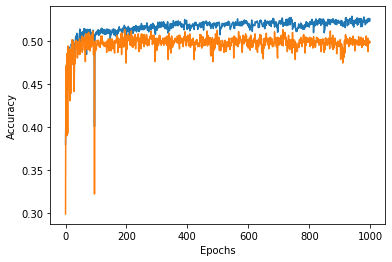

In [350]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [351]:
test_csv=  pd.read_csv(Data_test,sep=";",encoding="utf-8")
display(test_csv)

,Unnamed: 0,id_match,date,idHomeTeam,idAwayTeam,homeTeam,awayTeam,score,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,...,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away
0,1812,274264,2019-11-04,5601,5530,Portimonense SC,CD Santa Clara,0.0,1,0,...,100,100,0.666667,0.555556,0.444444,0.333333,1.555556,0.777778,0.888889,0.555556
1,1813,274272,2019-11-08,5544,5533,CD Aves,Gil Vicente FC,2.0,1,2,...,100,100,1.100000,0.700000,0.800000,0.100000,2.400000,1.100000,1.000000,0.600000
2,1814,274268,2019-11-09,496,5620,Rio Ave FC,Vitória FC,1.0,1,0,...,100,100,1.400000,0.300000,0.600000,0.100000,1.300000,0.600000,0.700000,0.300000
3,1815,274271,2019-11-09,5530,1903,CD Santa Clara,Sport Lisboa e Benfica,2.0,1,0,...,100,6562,0.600000,2.000000,0.300000,0.571429,0.571429,0.857143,0.428571,0.285714
4,1816,274273,2019-11-09,5531,583,FC Famalicão,Moreirense FC,0.0,2,0,...,100,100,2.000000,1.000000,0.400000,0.500000,1.300000,1.200000,0.400000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,1970,274419,2020-06-23,503,810,FC Porto,Boavista FC,1.0,0,0,...,6206,100,1.896552,0.851852,1.000000,0.481481,0.777778,0.925926,0.444444,0.481481
159,1971,274427,2020-06-24,1049,507,CD Tondela,FC Paços de Ferreira,2.0,0,2,...,100,100,0.814815,0.851852,0.407407,0.296296,1.185185,1.407407,0.703704,0.555556
160,1972,274422,2020-06-24,583,5531,Moreirense FC,FC Famalicão,0.0,0,0,...,100,100,1.333333,1.592593,0.518519,0.518519,1.259259,1.555556,0.592593,0.481481
161,1973,274420,2020-06-25,5613,5543,Sporting Clube de Braga,Vitória SC,1.0,2,2,...,100,100,1.592593,1.629630,0.740741,0.629630,1.111111,1.074074,0.370370,0.629630


In [353]:
test_columns={'win_cons_home':test_csv.win_cons_home,'win_cons_away':test_csv.win_cons_away,'lose_cons_home':test_csv.lose_cons_home,'lose_cons_away':test_csv.lose_cons_away,'puissance_HomeTeam':test_csv.puissance_HomeTeam,'puissance_AwayTeam':test_csv.puissance_AwayTeam}
df = pd.DataFrame(test_columns)
x_test = df.values
x_test

array([[   0,    0,    1,    0,  100,  100],
       [   0,    1,    8,    0,  100,  100],
       [   0,    1,    1,    0,  100,  100],
       [   0,    0,    0,    1,  100, 6562],
       [   0,    0,    0,    0,  100,  100],
       [   0,    0,    1,    0,  100,  100],
       [   0,    1,    2,    0,  100,  100],
       [   0,    1,    1,    0,  100,  100],
       [   0,    0,    0,    0,  100,  100],
       [   0,    1,    1,    0,  100, 6206],
       [   0,    0,    1,    2,  100,  100],
       [   0,    0,    0,    9,  100,  100],
       [   0,    0,    0,    0, 6562,  100],
       [   0,    0,    0,    0,  100,  100],
       [   0,    0,    1,    1,  100,  100],
       [   0,    0,    1,    1,  100,  100],
       [   2,    1,    0,    0,  100,  100],
       [   1,    1,    0,    0,  100,  100],
       [   2,    1,    0,    0, 6206,  100],
       [   1,    1,    0,    0,  100, 6562],
       [   0,    0,    1,    2,  100,  100],
       [   0,    0,    1,    2,  100,  100],
       [  

In [357]:
y_test = test_csv['score'].values
y_test[58]

1.0

In [358]:
print(test_csv.shape)
print(train_csv.shape)

(163, 36)
(6025, 19)


In [359]:
predictions = model.predict((x_test, y_test))

In [414]:
print(x_test[1])
print(y_test[1])
plt.show()
preds = model.predict((x_test, y_test))
print(preds[1])
np.argmax(predictions[1])

[  0   1   8   0 100 100]
2.0
[2.8816203e-02 3.7092903e-01 6.0025471e-01 1.9682416e-08 5.7032109e-15]


2

# Prédiction Unique

In [433]:
unique = test_csv.values
results = []
equal = []
victory = []
loss = []
i = 0
unique.shape
cpt = 0

In [434]:
for i in unique:
    puissance_homeTeam = i[26]
    puissance_awayTeam = i[27]
    win_cons_home = i[14]
    win_cons_away = i[15]
    lose_cons_home = i[16]
    lose_cons_away= i[17]
    predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
    egalite = predictions1[0][0]*100
    victoire = predictions1[0][1]*100
    perte = predictions1[0][2]*100
    result = np.argmax(predictions1)
    results.append(result)
    equal.append(egalite)
    victory.append(victoire)
    loss.append(perte)
    print(result,egalite,victoire,perte,puissance_homeTeam,puissance_awayTeam,cpt)
    cpt = cpt+1

1 29.52568531036377 46.98992669582367 23.484334349632263 100 100 0
2 2.881620265543461 37.0929092168808 60.025471448898315 100 100 1
1 29.560229182243347 47.00004160404205 23.439674079418182 100 100 2
2 25.894564390182495 30.300843715667725 43.804314732551575 100 6562 3
1 30.188003182411194 47.18104004859924 22.630910575389862 100 100 4
1 29.52568531036377 46.98992669582367 23.484334349632263 100 100 5
1 28.91833484172821 45.673635601997375 25.407874584197998 100 100 6
1 29.560229182243347 47.00004160404205 23.439674079418182 100 100 7
1 30.188003182411194 47.18104004859924 22.630910575389862 100 100 8
2 26.003745198249817 30.905812978744507 43.09016466140747 100 6206 9
1 26.105928421020508 48.297202587127686 25.596797466278076 100 100 10
0 57.013124227523804 31.347694993019104 11.639178544282913 100 100 11
1 22.27797359228134 63.25191259384155 14.470107853412628 6562 100 12
1 30.188003182411194 47.18104004859924 22.630910575389862 100 100 13
1 26.50381028652191 47.465917468070984 26.0

1 30.2043616771698 47.180432081222534 22.615160048007965 100 100 123
1 25.901854038238525 49.18489158153534 24.913223087787628 100 100 124
1 26.105928421020508 48.297202587127686 25.596797466278076 100 100 125
2 24.445340037345886 24.30446147918701 51.249974966049194 100 100 126
1 29.52568531036377 46.98992669582367 23.484334349632263 100 100 127
2 26.00548267364502 30.91573715209961 43.07850897312164 100 6206 128
1 26.626023650169373 44.760507345199585 28.613433241844177 100 100 129
1 22.27797359228134 63.25191259384155 14.470107853412628 6562 100 130
2 25.925880670547485 30.1275372505188 43.946245312690735 100 100 131
2 25.572848320007324 27.420321106910706 47.006163001060486 100 100 132
1 26.626023650169373 44.760507345199585 28.613433241844177 100 100 133
1 30.2043616771698 47.180432081222534 22.615160048007965 100 100 134
1 28.274005651474 47.05102741718292 24.674871563911438 100 100 135
1 29.560229182243347 47.00004160404205 23.439674079418182 100 100 136
1 30.2043616771698 47.18

In [435]:
predictions1 = model.predict(np.array([[win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,puissance_homeTeam,puissance_awayTeam]])) # predictions avec puissance de teams au hasard
result = np.argmax(predictions1)
if result == 0:
    print("La HomeTeam va égaliser contre l'Awayteam")
if result == 1:
    print("La HomeTeam va gagner contre l'Awayteam")
if result == 2:
    print("La HomeTeam va perdre contre l'Awayteam")


La HomeTeam va gagner contre l'Awayteam


In [ ]:
# 'date':test_csv.date,'id_HomeTeam':test_csv.idHomeTeam,'id_AwayTeam':test_csv.idAwayTeam,'homeTeam':test_csv.homeTeam,'AwayTeam':test_csv.awayTeam,'prediction_egalite':equal,'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results

In [436]:
predictions1[0]

array([2.9646462e-01, 4.6740672e-01, 2.3612800e-01, 6.6757616e-07,
       3.5593364e-09], dtype=float32)

In [437]:
print(len(equal))
print(len(victory))
test_csv.homeTeam.shape

163
163


(163,)

In [440]:
df = {'id_match':test_csv.id_match,'date':test_csv.date,'id_HomeTeam':test_csv.idHomeTeam,'id_AwayTeam':test_csv.idAwayTeam,'homeTeam':test_csv.homeTeam,'AwayTeam':test_csv.awayTeam,'prediction_egalite': equal,'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results}

In [441]:
d = pd.DataFrame(df)

In [442]:
d

,id_match,date,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,prediction_egalite,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
0,274264,2019-11-04,5601,5530,Portimonense SC,CD Santa Clara,29.525685,46.989927,23.484334,1
1,274272,2019-11-08,5544,5533,CD Aves,Gil Vicente FC,2.881620,37.092909,60.025471,2
2,274268,2019-11-09,496,5620,Rio Ave FC,Vitória FC,29.560229,47.000042,23.439674,1
3,274271,2019-11-09,5530,1903,CD Santa Clara,Sport Lisboa e Benfica,25.894564,30.300844,43.804315,2
4,274273,2019-11-09,5531,583,FC Famalicão,Moreirense FC,30.188003,47.181040,22.630911,1
...,...,...,...,...,...,...,...,...,...,...
158,274419,2020-06-23,503,810,FC Porto,Boavista FC,22.918101,61.434668,15.647231,1
159,274427,2020-06-24,1049,507,CD Tondela,FC Paços de Ferreira,29.560229,47.000042,23.439674,1
160,274422,2020-06-24,583,5531,Moreirense FC,FC Famalicão,30.188003,47.181040,22.630911,1
161,274420,2020-06-25,5613,5543,Sporting Clube de Braga,Vitória SC,30.188003,47.181040,22.630911,1


In [443]:
d.to_csv('predictions_gain_perte.csv',index = False)
d.to_json (r'predictions_gain_perte.json')